# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 1.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

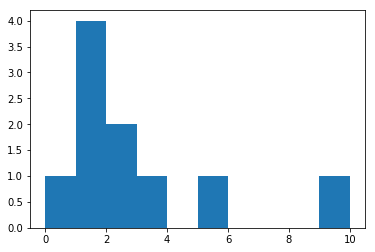

In [9]:
plt.hist(X[1]);

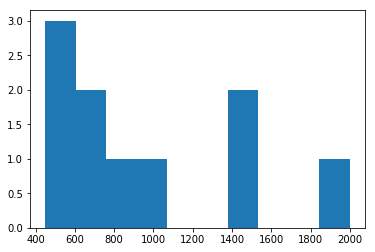

In [10]:
plt.hist(X[2]);

In [11]:
X1_mean = X[1].mean()
X1_mean

2.6

In [12]:
X1_std = X[1].std()
X1_std

2.8000000000000003

In [13]:
X_st = X.copy().astype(np.float64)

In [14]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

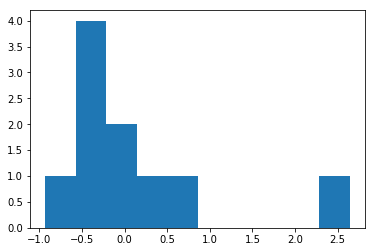

In [15]:
plt.hist(X_st[1]);

In [16]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [17]:
X_st[2] = custom_StandardScaler(X[2])

In [18]:
X_st[3] = custom_StandardScaler(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

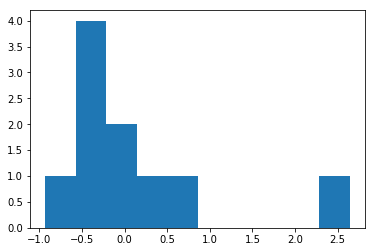

In [19]:
plt.hist(X_st[1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [20]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [21]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [22]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 100.71908445135543, веса: [49.83881396  3.29888756  3.01195394  5.29399915]
# итерация: 200, MSE: 41.68790955448214, веса: [56.39723886  3.9129983   2.7855109   4.95623188]
# итерация: 300, MSE: 40.329859154782966, веса: [57.26701426  4.37916528  2.57763963  4.69944412]
# итерация: 400, MSE: 40.11147544800725, веса: [57.38236349  4.74335492  2.40009526  4.51409276]
# итерация: 500, MSE: 39.98822459865813, веса: [57.39766105  5.02859855  2.24888402  4.38126873]
# итерация: 600, MSE: 39.912004186110906, веса: [57.39968981  5.25256566  2.12038861  4.28690282]
# итерация: 700, MSE: 39.864260305598904, веса: [57.39995886  5.42886675  2.01140958  4.2205771 ]
# итерация: 800, MSE: 39.83403690728394, веса: [57.39999454  5.56800471  1.91914053  4.17459517]
# итерация: 900, MSE: 39.81470529121025, веса: [57.39999928  5.67809983  1.84113642  4.14328627]
# итерация: 1000, MSE: 39.80221562870548, веса: [57.3999999   5.76544291  1.77527897  4.12248502]


array([57.3999999 ,  5.76544291,  1.77527897,  4.12248502])

In [23]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [24]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 40.57975913943609, веса: [57.3962171   5.37883919  2.35263117  3.95047358]
# итерация: 1000, MSE: 39.28741395922087, веса: [57.39812756  5.86205677  1.80313377  4.02131804]
# итерация: 1500, MSE: 38.70879135754676, веса: [57.39792079  6.03630222  1.57690349  4.07539562]
# итерация: 2000, MSE: 38.45876913276348, веса: [57.39784129  6.10169419  1.48431674  4.10349543]
# итерация: 2500, MSE: 38.353272850704016, веса: [57.3978101   6.12693558  1.44655774  4.11639384]
# итерация: 3000, MSE: 38.309436382367984, веса: [57.39779771  6.13686298  1.4311908   4.12199118]
# итерация: 3500, MSE: 38.29139225592173, веса: [57.39779275  6.1408145   1.4249446   4.1243507 ]
# итерация: 4000, MSE: 38.284007320440686, веса: [57.39779075  6.14239917  1.42240759  4.12532954]
# итерация: 4500, MSE: 38.28099533897719, веса: [57.39778995  6.14303759  1.4213776   4.12573191]
# итерация: 5000, MSE: 38.27976945352775, веса: [57.39778962  6.14329552  1.42095954  4.12589643]


array([57.39778962,  6.14329552,  1.42095954,  4.12589643])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [25]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8, vebrose=False):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if vebrose:
            if i % (iterations / 10) == 0:
                print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [26]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4, vebrose=True)

# итерация: 500, MSE: 39.98166412253417, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406399, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.78240504280036, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.778523565788916, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.777887486171274, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.77777930470262, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405892, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321602, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.777755024514185, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.77775476050768, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [27]:
lam_1 = np.logspace(-20, 0, 20)
lam_1

array([1.00000000e-20, 1.12883789e-19, 1.27427499e-18, 1.43844989e-17,
       1.62377674e-16, 1.83298071e-15, 2.06913808e-14, 2.33572147e-13,
       2.63665090e-12, 2.97635144e-11, 3.35981829e-10, 3.79269019e-09,
       4.28133240e-08, 4.83293024e-07, 5.45559478e-06, 6.15848211e-05,
       6.95192796e-04, 7.84759970e-03, 8.85866790e-02, 1.00000000e+00])

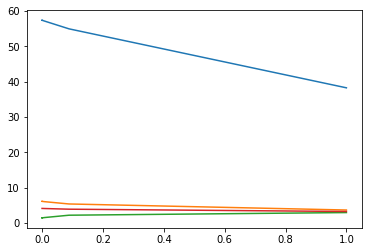

In [29]:
w_1 = []
for i in lam_1:
    w = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=i)
    w_1.append(w)
w_1 = np.array(w_1)

for i in range(len(w_1[0])):
    plt.plot(lam_1, w_1[:, i])
plt.show()

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию? 
### НЕТ

3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

In [30]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [31]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.9815492692797, веса: [57.3976156   5.1079242   2.46011903  4.08691798]
# итерация: 1000, MSE: 39.80712300604174, веса: [57.3999499   5.76651203  1.85620907  4.03912572]
# итерация: 1500, MSE: 39.78234087113101, веса: [57.39995     5.99151699  1.60431305  4.06910179]
# итерация: 2000, MSE: 39.77848915615645, веса: [57.39995     6.07256443  1.50039558  4.09329499]
# итерация: 2500, MSE: 39.77786776237368, веса: [57.39995     6.10296578  1.45779797  4.10604572]
# итерация: 3000, MSE: 39.7777660764615, веса: [57.39995     6.11470092  1.44040178  4.11193613]
# итерация: 3500, MSE: 39.777749346503995, веса: [57.39995    6.1193181  1.4333132  4.1145017]
# итерация: 4000, MSE: 39.77774658745511, веса: [57.39995     6.12115708  1.43042856  4.11558584]
# итерация: 4500, MSE: 39.77774613157808, веса: [57.39995     6.12189515  1.42925561  4.11603642]
# итерация: 5000, MSE: 39.77774605600939, веса: [57.39995     6.12219276  1.42877888  4.11622191]


array([57.39995   ,  6.12219276,  1.42877888,  4.11622191])